In [19]:
import pandas as pd
import re
import pymorphy2

In [20]:
PATH_TO_DICTIONARY_SOURCE_DIR = "../../data/dictionaries/source"

In [21]:
PATH_TO_ASPELL_SOURCE_DICT = PATH_TO_DICTIONARY_SOURCE_DIR + "/aspell_words_ru.txt"

In [22]:
with open(PATH_TO_ASPELL_SOURCE_DICT) as file:
    words_str = file.read()

In [23]:
words_list = re.split(' |\n', words_str)
words_list

['юань',
 'юанях',
 'юанями',
 'юаням',
 'юаней',
 'юани',
 'юане',
 'юанем',
 'юаню',
 'юаня',
 'ЮАР',
 'юбилей',
 'юбилеях',
 'юбилеями',
 'юбилеям',
 'юбилеев',
 'юбилеи',
 'юбилее',
 'юбилеем',
 'юбилею',
 'юбилея',
 'юбилейный',
 'юбилейное',
 'юбилейную',
 'юбилейною',
 'юбилейной',
 'юбилейная',
 'юбилейными',
 'юбилейных',
 'юбилейные',
 'юбилейном',
 'юбилейным',
 'юбилейному',
 'юбилейного',
 'юбиляр',
 'юбилярах',
 'юбилярами',
 'юбилярам',
 'юбиляров',
 'юбиляры',
 'юбиляре',
 'юбиляром',
 'юбиляру',
 'юбиляра',
 'юбилярша',
 'юбиляршах',
 'юбиляршами',
 'юбиляршам',
 'юбилярш',
 'юбиляршею',
 'юбиляршей',
 'юбиляршу',
 'юбилярше',
 'юбилярши',
 'юбка',
 'юбках',
 'юбками',
 'юбкам',
 'юбок',
 'юбкою',
 'юбкой',
 'юбку',
 'юбке',
 'юбки',
 'юбочка',
 'юбочках',
 'юбочками',
 'юбочкам',
 'юбочек',
 'юбочкою',
 'юбочкой',
 'юбочку',
 'юбочке',
 'юбочки',
 'юбочник',
 'юбочниках',
 'юбочниками',
 'юбочникам',
 'юбочников',
 'юбочники',
 'юбочнике',
 'юбочником',
 'юбочнику',
 

In [24]:
aspell_data = pd.DataFrame(words_list, columns=["word"])
aspell_data.head()

,word
0,юань
1,юанях
2,юанями
3,юаням
4,юаней


In [25]:
aspell_data["length"] = aspell_data.word.map(lambda x: len(x))

In [26]:
aspell_data.head()

,word,length
0,юань,4
1,юанях,5
2,юанями,6
3,юаням,5
4,юаней,5


<AxesSubplot:>

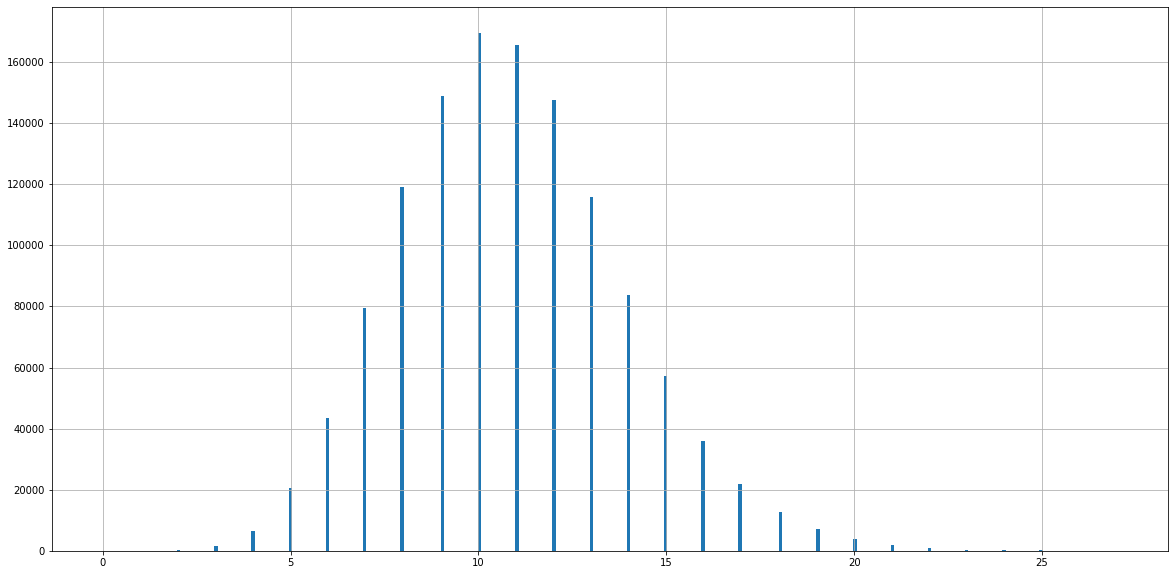

In [27]:
aspell_data["length"].hist(bins=300, figsize=(20,10))

In [28]:
aspell_data["length"].value_counts()

10    169525
11    165731
9     149014
12    147637
8     119059
13    115770
14     83893
7      79353
15     57240
6      43566
16     36076
17     21747
5      20553
18     12587
19      7160
4       6631
20      3730
21      1938
3       1493
22       990
23       374
24       232
2        169
25       102
26        19
1          8
27         1
0          1
Name: length, dtype: int64

In [29]:
aspell_data = aspell_data[aspell_data["length"] != 0]

In [30]:
aspell_data = aspell_data.drop(columns=["length"])

In [31]:
aspell_data.to_csv("../../data/dictionaries/processed/processed_aspell_words_ru.txt", header=None, index=None, sep=' ', mode='a')

In [32]:
lemmatizer = pymorphy2.MorphAnalyzer()
aspell_data = pd.DataFrame(set(aspell_data.word.map(lambda word: lemmatizer.parse(word)[0].normal_form)), columns=["word"])

In [33]:
aspell_data.head()

,word
0,ракетостроение
1,маргинализация
2,применимость
3,шлюха
4,пережевать


In [34]:
aspell_data.to_csv("../../data/dictionaries/processed/processed_lemmatized_aspell_words_ru.txt", header=None, index=None, sep=' ', mode='w')